<a href="https://colab.research.google.com/github/KaanYigitsoy13/Global_Countries_2023_EDA/blob/main/Global_Fertility_Insights_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction and Feature Overview

This comprehensive dataset provides a wealth of information about all countries worldwide, covering a wide range of indicators and attributes. It encompasses demographic statistics, economic indicators, environmental factors, healthcare metrics, education statistics, and much more. With every country represented, this dataset offers a complete global perspective on various aspects of nations, enabling in-depth analyses and cross-country comparisons.

## Analysis Purpose
Understanding how do various socioeconomic, environmental, and health-related factors correlate with the fertility rate across different countries, and what underlying patterns emerge from a geospatial perspective?

## Key Features


* Country: Name of the country.
* Density (P/Km2): Population density measured in persons per square kilometer.
* Abbreviation: Abbreviation or code representing the country.
* Agricultural Land (%): Percentage of land area used for agricultural purposes.
* Land Area (Km2): Total land area of the country in square kilometers.
* Armed Forces Size: Size of the armed forces in the country.
* Birth Rate: Number of births per 1,000 population per year.
* Calling Code: International calling code for the country.
* Capital/Major City: Name of the capital or major city.
* CO2 Emissions: Carbon dioxide emissions in tons.
* CPI: Consumer Price Index, a measure of inflation and purchasing power.
* CPI Change (%): Percentage change in the Consumer Price Index compared to the previous year.
* Currency_Code: Currency code used in the country.
* Fertility Rate: Average number of children born to a woman during her lifetime.
* Forested Area (%): Percentage of land area covered by forests.
* Gasoline_Price: Price of gasoline per liter in local currency.
* GDP: Gross Domestic Product, the total value of goods and services produced in the country.
* Gross Primary Education Enrollment (%): Gross enrollment ratio for primary education.
* Gross Tertiary Education Enrollment (%): Gross enrollment ratio for tertiary education.
* Infant Mortality: Number of deaths per 1,000 live births before reaching one year of age.
* Largest City: Name of the country's largest city.
* Life Expectancy: Average number of years a newborn is expected to live.
* Maternal Mortality Ratio: Number of maternal deaths per 100,000 live births.
* Minimum Wage: Minimum wage level in local currency.
* Official Language: Official language(s) spoken in the country.
* Out of Pocket Health Expenditure (%): Percentage of total health expenditure paid out-of-pocket by individuals.
* Physicians per Thousand: Number of physicians per thousand people.
* Population: Total population of the country.
* Population: Labor Force Participation (%): Percentage of the population that is part of the labor force.
* Tax Revenue (%): Tax revenue as a percentage of GDP.
* Total Tax Rate: Overall tax burden as a percentage of commercial profits.
* Unemployment Rate: Percentage of the labor force that is unemployed.
* Urban Population: Percentage of the population living in urban areas.
* Latitude: Latitude coordinate of the country's location.
* Longitude: Longitude coordinate of the country's location.

# Data Quality Assessment

## Importing Packages

In [67]:
# Importing Packages

# Data Manipulation Libraries
import pandas as pd
import numpy as np

# Data Visualization Libraries
## Matplotlib for Basic Plotting
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

## Seaborn for Enhanced Visualizations
import seaborn as sns

## Plotly for Interactive Plots
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Missing Data Visualization
import missingno as msno

# Geospatial Data Visualization
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Polygon

## Loading the Data

In [68]:
# # Load the original dataset
data_original = pd.read_csv('global_countries_2023.csv')

## Explore the Dataframe

In [69]:
# Check data types and non-null counts of columns
data_original.info()

# Display the first few rows of the dataset with all columns
pd.set_option('display.max_columns', None)
data_original.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 35 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country                                    195 non-null    object 
 1   Density
(P/Km2)                            195 non-null    object 
 2   Abbreviation                               188 non-null    object 
 3   Agricultural Land( %)                      188 non-null    object 
 4   Land Area(Km2)                             194 non-null    object 
 5   Armed Forces size                          171 non-null    object 
 6   Birth Rate                                 189 non-null    float64
 7   Calling Code                               194 non-null    float64
 8   Capital/Major City                         192 non-null    object 
 9   Co2-Emissions                              188 non-null    object 
 10  CPI                       

Country Density\n(P/Km2) Abbreviation Agricultural Land( %)  \
0  Afghanistan               60           AF                58.10%   
1      Albania              105           AL                43.10%   
2      Algeria               18           DZ                17.40%   
3      Andorra              164           AD                40.00%   
4       Angola               26           AO                47.50%   

  Land Area(Km2) Armed Forces size  Birth Rate  Calling Code  \
0        652,230           323,000       32.49          93.0   
1         28,748             9,000       11.78         355.0   
2      2,381,741           317,000       24.28         213.0   
3            468               NaN        7.20         376.0   
4      1,246,700           117,000       40.73         244.0   

  Capital/Major City Co2-Emissions     CPI CPI Change (%) Currency-Code  \
0              Kabul         8,672   149.9          2.30%           AFN   
1             Tirana         4,536  119.05          1.40%           ALL   
2            Algiers       150,006  151.36          2.00%           DZD   
3   Andorra la Vella           469     NaN            NaN           EUR   
4             Luanda        34,693  261.73         17.10%           AOA   

   Fertility Rate Forested Area (%) Gasoline Price                GDP  \
0            4.47             2.10%         $0.70    $19,101,353,833    
1            1.62            28.10%         $1.36    $15,278,077,447    
2            3.02             0.80%         $0.28   $169,988,236,398    
3            1.27            34.00%         $1.51     $3,154,057,987    
4            5.52            46.30%         $0.97    $94,635,415,870    

  Gross primary education enrollment (%)  \
0                                104.00%   
1                                107.00%   
2                                109.90%   
3                                106.40%   
4                                113.50%   

  Gross tertiary education enrollment (%)  Infant mortality      Largest city  \
0                                   9.70%              47.9             Kabul   
1                                  55.00%               7.8            Tirana   
2                                  51.40%              20.1           Algiers   
3                                     NaN               2.7  Andorra la Vella   
4                                   9.30%              51.6            Luanda   

   Life expectancy  Maternal mortality ratio Minimum wage Official language  \
0             64.5                     638.0       $0.43             Pashto   
1             78.5                      15.0       $1.12           Albanian   
2             76.7                     112.0       $0.95             Arabic   
3              NaN                       NaN       $6.63            Catalan   
4             60.8                     241.0       $0.71         Portuguese   

  Out of pocket health expenditure  Physicians per thousand  Population  \
0                           78.40%                     0.28  38,041,754   
1                           56.90%                     1.20   2,854,191   
2                           28.10%                     1.72  43,053,054   
3                           36.40%                     3.33      77,142   
4                           33.40%                     0.21  31,825,295   

  Population: Labor force participation (%) Tax revenue (%) Total tax rate  \
0                                    48.90%           9.30%         71.40%   
1                                    55.70%          18.60%         36.60%   
2                                    41.20%          37.20%         66.10%   
3                                       NaN             NaN            NaN   
4                                    77.50%           9.20%         49.10%   

  Unemployment rate Urban_population   Latitude  Longitude  
0            11.12%        9,797,273  33.939110  67.709953  
1            12.33%        1,747,593  41.1

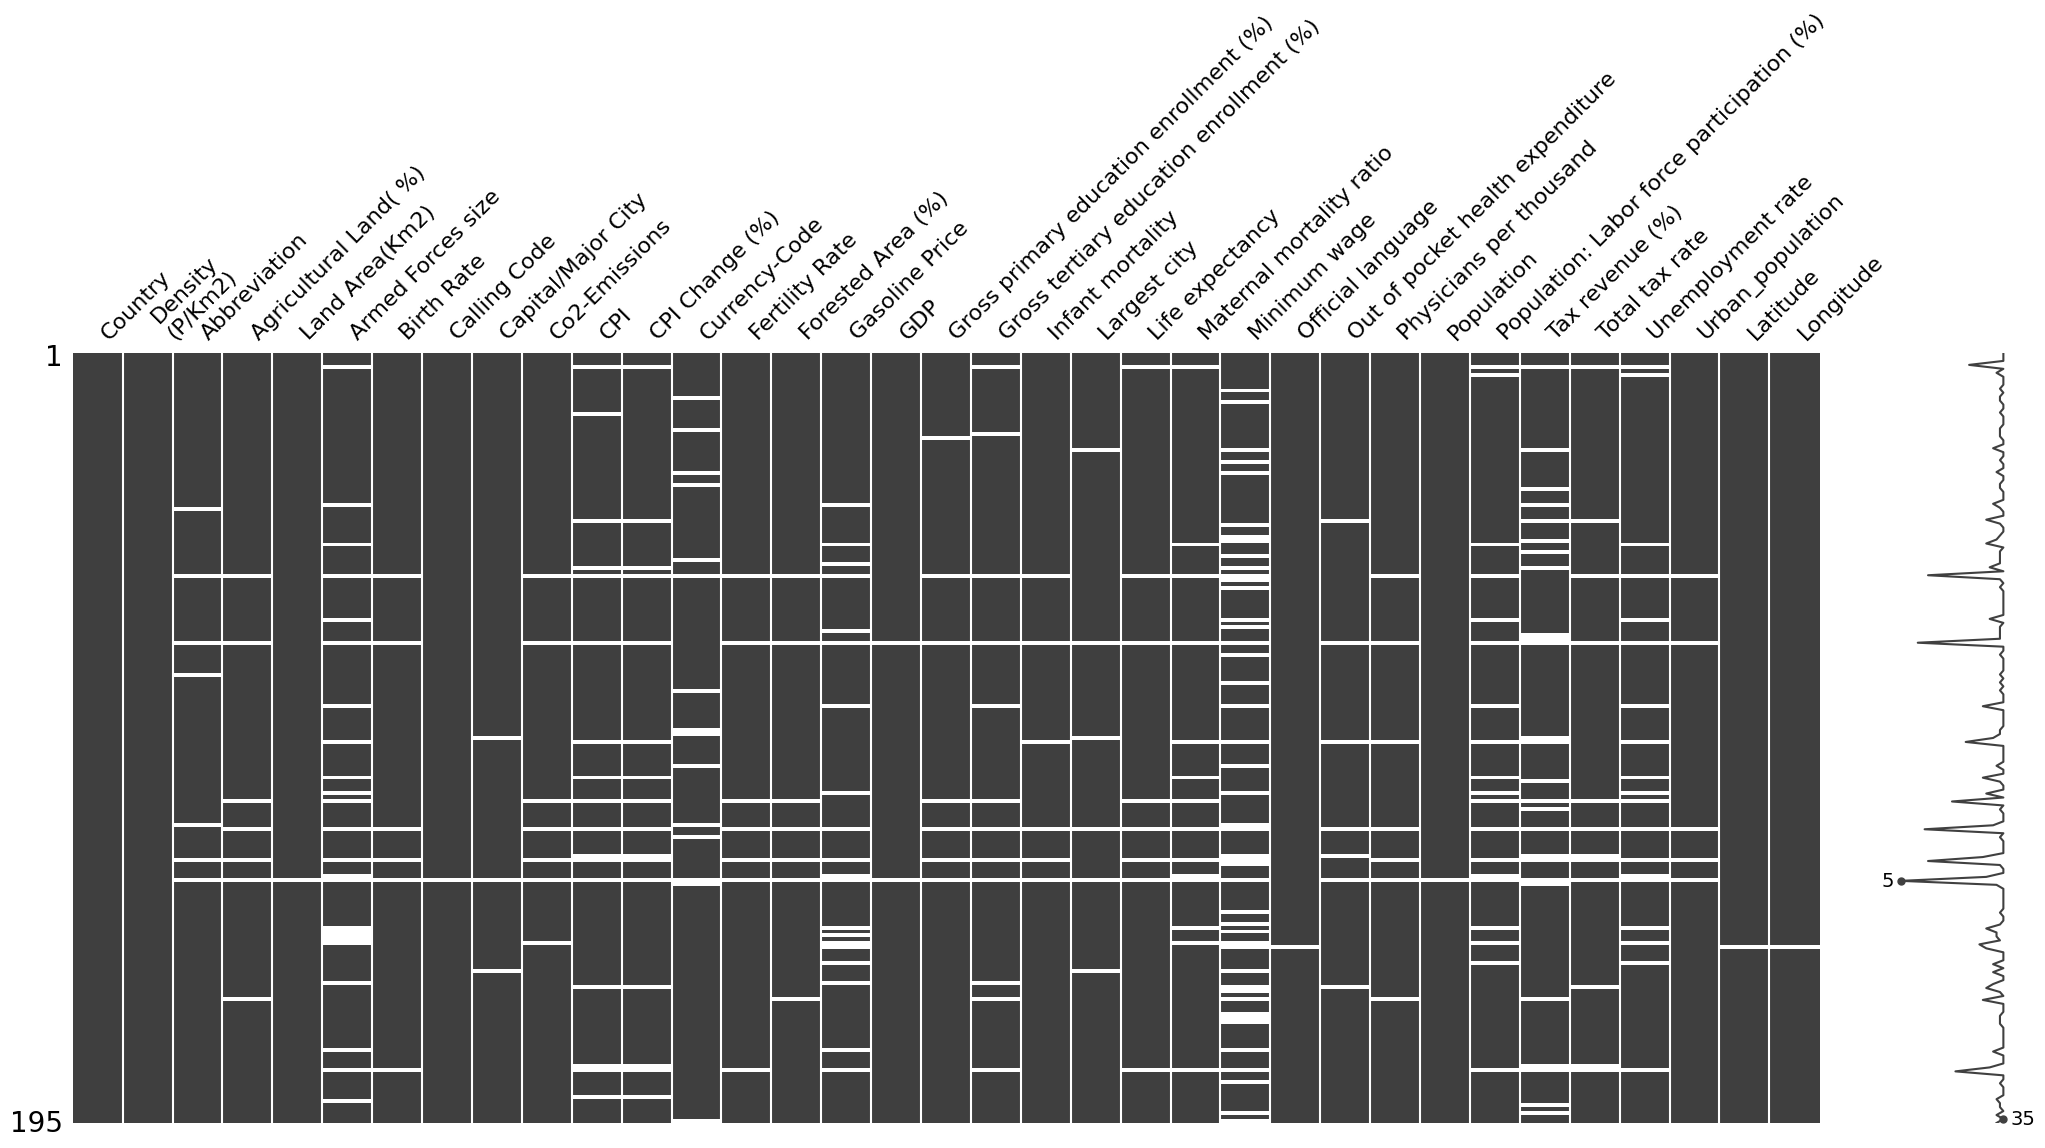

In [70]:
# Visualize the distribution of missing values across the dataset
msno.matrix(data_original)
plt.show()

In [71]:
# Calculate and display the percentage of rows containing missing values
null_rows = data_original[data_original.isnull().any(axis=1)]
percentage = len(null_rows) / len(data_original)
formatted_percentage = "{:.2%}".format(percentage)
print(f"{formatted_percentage}% of the rows contain null values")

43.59%% of the rows contain null values


In [72]:
# Identify and count duplicate country names in the dataset
duplicate_countries = data_original['Country'].duplicated().sum()
print(f'There are {duplicate_countries} duplicate country entries in the dataframe')

There are 0 duplicate country entries in the dataframe


## Findings

Several columns appear to have incorrect data types. They are currently set as object types, likely due to the presence of special characters like '%' or '$'. These columns should ideally be of numerical data types:
Density(P/Km^2),
Agricultural Land(%),
Land Area(Km^2),
Armed Forces size,
Co2-Emissions,
CPI,
CPI Change(%),
Forested Area(%),
Gasoline Price,
GDP,
Gross primary education enrollment(%),
Gross tertiary education enrollment(%),
Minimum wage,
Official language,
Out of pocket health expenditure,
Population,
Population: Labor force participation(%),
Tax revenue(%),
Total tax rate,
Unemployment rate,
Urban_population.

A significant portion of the dataset, specifically 43%, contains rows with missing values in at least one column.

# Data Cleaning Procedures

In [73]:
# Correcting data types for specified columns
data = data_original.copy()

# List of columns with incorrect data types
wrong_dtype_columns = ['Density\n(P/Km2)',
                       'Agricultural Land( %)',
                       'Land Area(Km2)',
                       'Armed Forces size',
                       'Co2-Emissions',
                       'CPI',
                       'CPI Change (%)',
                       'Forested Area (%)',
                       'Gasoline Price',
                       'GDP',
                       'Gross primary education enrollment (%)',
                       'Gross tertiary education enrollment (%)',
                       'Minimum wage',
                       'Out of pocket health expenditure',
                       'Population',
                       'Population: Labor force participation (%)',
                       'Tax revenue (%)',
                       'Total tax rate',
                       'Unemployment rate',
                       'Urban_population']

# Transform columns to float by removing special characters and converting to numeric values
data[wrong_dtype_columns] = data[wrong_dtype_columns].applymap(lambda x: float(str(x).replace(',', '').replace('$', '').replace('%', '')))

In [74]:
# Removing rows with missing values
# Given the potential for geographic and political variances between countries, imputation (using means, medians, or modes) may not be suitable and could lead to inaccurate interpretations. Therefore, we'll proceed with the data we are confident about.
data.dropna(inplace=True)


# Removing the 'Gross primary education enrollment (%)' column because a majority (75%) of its values exceed 100, which is not feasible.
data.drop('Gross primary education enrollment (%)', axis=1, inplace=True)

# Removing rows where 'Gross tertiary education enrollment (%)' exceeds 100 as such values are not realistic.
data.drop(data[data['Gross tertiary education enrollment (%)'] > 100].index, inplace=True)

In [75]:
# Define bin edges
latitude_bins = list(np.arange(-45, 66, 10))
longitude_bins = list(np.arange(-110, 181, 20))
fertility_bins = list(np.arange(0, 8, 0.5))
taxrevenue_bins = list(np.arange(0, 41, 5))

# Segment data into bins for easier analysis and visualization
data['latitude_bin'] = pd.cut(data['Latitude'], bins=latitude_bins)
data['longitude_bin'] = pd.cut(data['Longitude'], bins=longitude_bins)
data['fertility_bin'] = pd.cut(data['Fertility Rate'], bins=fertility_bins)
data['taxrevenue_bin'] = pd.cut(data['Tax revenue (%)'], bins=taxrevenue_bins)

In [76]:
# Generate descriptive statistics for the dataset's numerical columns

data.describe()

Density\n(P/Km2)  Agricultural Land( %)  Land Area(Km2)  \
count        108.000000             108.000000    1.080000e+02   
mean         150.425926              42.528704    9.909675e+05   
std          212.242244              19.620874    2.413837e+06   
min            2.000000               2.600000    3.160000e+02   
25%           35.500000              28.575000    6.553250e+04   
50%           91.000000              43.200000    2.397855e+05   
75%          152.250000              56.575000    7.534875e+05   
max         1380.000000              82.600000    1.709824e+07   

       Armed Forces size  Birth Rate  Calling Code  Co2-Emissions  \
count       1.080000e+02  108.000000    108.000000   1.080000e+02   
mean        2.011111e+05   20.378796    349.824074   2.709821e+05   
std         4.451496e+05   10.036237    341.922952   1.092063e+06   
min         1.000000e+03    6.400000      1.000000   4.950000e+02   
25%         1.200000e+04   11.225000     83.500000   6.944500e+03   
50%         4.150000e+04   17.905000    242.000000   2.495200e+04   
75%         1.922500e+05   28.375000    441.000000   1.208485e+05   
max         3.031000e+06   46.080000   1876.000000   9.893038e+06   

               CPI  CPI Change (%)  Fertility Rate  Forested Area (%)  \
count   108.000000      108.000000      108.000000         108.000000   
mean    162.918241        4.894444        2.693056          29.717593   
std     129.781330        8.750785        1.310848          20.626269   
min     105.680000       -3.200000        0.980000           0.000000   
25%     116.690000        1.400000        1.687500          11.525000   
50%     133.730000        2.800000        2.210000          31.150000   
75%     166.500000        4.825000        3.522500          42.875000   
max    1344.190000       53.500000        6.910000          90.000000   

       Gasoline Price           GDP  Gross tertiary education enrollment (%)  \
count      108.000000  1.080000e+02                               108.000000   
mean         0.967593  7.059037e+11                                39.602778   
std          0.306798  2.836833e+12                                26.722585   
min          0.240000  1.673540e+09                                 0.800000   
25%          0.737500  1.806618e+10                                15.525000   
50%          0.975000  6.109475e+10                                36.100000   
75%          1.160000  2.873814e+11                                63.900000   
max          1.810000  2.142770e+13                                94.300000   

       Infant mortality  Life expectancy  Maternal mortality ratio  \
count        108.000000       108.000000                108.000000   
mean          20.585185        72.499074                139.685185   
std           18.477917         6.947043                202.215192   
min            1.700000        54.300000                  2.000000   
25%            6.175000        67.525000                 16.750000   
50%           13.750000        74.400000                 43.000000   
75%           32.025000        77.125000                179.000000   
max           78.500000        83.300000               1120.000000   

       Minimum wage  Out of pocket health expenditure  \
count    108.000000                        108.000000   
mean       2.053426                         35.499074   
std        2.788350                         18.751431   
min        0.010000                          5.300000   
25%        0.390000                         21.375000   
50%        0.980000                         36.050000   
75%        2.290000                         46.650000   
max       13.050000                         81.600000   

       Physicians per thousand    Population  \
count               108.000000  1.080000e+02   
mean                  1.869907  6.201216e+07   
std                   1.565818  1.907981e+08   
min                   0.010000  2.870250e+05   
25%                   0.41

# Data Visualization Techniques

## High-Level Data Insights

In [80]:
# Selecting columns relevant to our research question for further analysis

potential_cols = ['Birth Rate',
               'CPI',
               'CPI Change (%)',
               'Fertility Rate',
               'Gasoline Price',
               'GDP',
               'Gross tertiary education enrollment (%)',
               'Infant mortality',
               'Life expectancy',
               'Maternal mortality ratio',
               'Minimum wage',
               'Out of pocket health expenditure',
               'Physicians per thousand',
               'Total tax rate',
               'Unemployment rate',
                 'Latitude',
                 'Longitude']


In [78]:
# Reviewing the summary statistics for the dataset's numerical columns
# The minimum value for 'Density(P/Km2)' seemed unusually low, but upon further research,
# this value was found to be accurate for Mongolia.
data.describe()

Density\n(P/Km2)  Agricultural Land( %)  Land Area(Km2)  \
count        108.000000             108.000000    1.080000e+02   
mean         150.425926              42.528704    9.909675e+05   
std          212.242244              19.620874    2.413837e+06   
min            2.000000               2.600000    3.160000e+02   
25%           35.500000              28.575000    6.553250e+04   
50%           91.000000              43.200000    2.397855e+05   
75%          152.250000              56.575000    7.534875e+05   
max         1380.000000              82.600000    1.709824e+07   

       Armed Forces size  Birth Rate  Calling Code  Co2-Emissions  \
count       1.080000e+02  108.000000    108.000000   1.080000e+02   
mean        2.011111e+05   20.378796    349.824074   2.709821e+05   
std         4.451496e+05   10.036237    341.922952   1.092063e+06   
min         1.000000e+03    6.400000      1.000000   4.950000e+02   
25%         1.200000e+04   11.225000     83.500000   6.944500e+03   
50%         4.150000e+04   17.905000    242.000000   2.495200e+04   
75%         1.922500e+05   28.375000    441.000000   1.208485e+05   
max         3.031000e+06   46.080000   1876.000000   9.893038e+06   

               CPI  CPI Change (%)  Fertility Rate  Forested Area (%)  \
count   108.000000      108.000000      108.000000         108.000000   
mean    162.918241        4.894444        2.693056          29.717593   
std     129.781330        8.750785        1.310848          20.626269   
min     105.680000       -3.200000        0.980000           0.000000   
25%     116.690000        1.400000        1.687500          11.525000   
50%     133.730000        2.800000        2.210000          31.150000   
75%     166.500000        4.825000        3.522500          42.875000   
max    1344.190000       53.500000        6.910000          90.000000   

       Gasoline Price           GDP  Gross tertiary education enrollment (%)  \
count      108.000000  1.080000e+02                               108.000000   
mean         0.967593  7.059037e+11                                39.602778   
std          0.306798  2.836833e+12                                26.722585   
min          0.240000  1.673540e+09                                 0.800000   
25%          0.737500  1.806618e+10                                15.525000   
50%          0.975000  6.109475e+10                                36.100000   
75%          1.160000  2.873814e+11                                63.900000   
max          1.810000  2.142770e+13                                94.300000   

       Infant mortality  Life expectancy  Maternal mortality ratio  \
count        108.000000       108.000000                108.000000   
mean          20.585185        72.499074                139.685185   
std           18.477917         6.947043                202.215192   
min            1.700000        54.300000                  2.000000   
25%            6.175000        67.525000                 16.750000   
50%           13.750000        74.400000                 43.000000   
75%           32.025000        77.125000                179.000000   
max           78.500000        83.300000               1120.000000   

       Minimum wage  Out of pocket health expenditure  \
count    108.000000                        108.000000   
mean       2.053426                         35.499074   
std        2.788350                         18.751431   
min        0.010000                          5.300000   
25%        0.390000                         21.375000   
50%        0.980000                         36.050000   
75%        2.290000                         46.650000   
max       13.050000                         81.600000   

       Physicians per thousand    Population  \
count               108.000000  1.080000e+02   
mean                  1.869907  6.201216e+07   
std                   1.565818  1.907981e+08   
min                   0.010000  2.870250e+05   
25%                   0.41

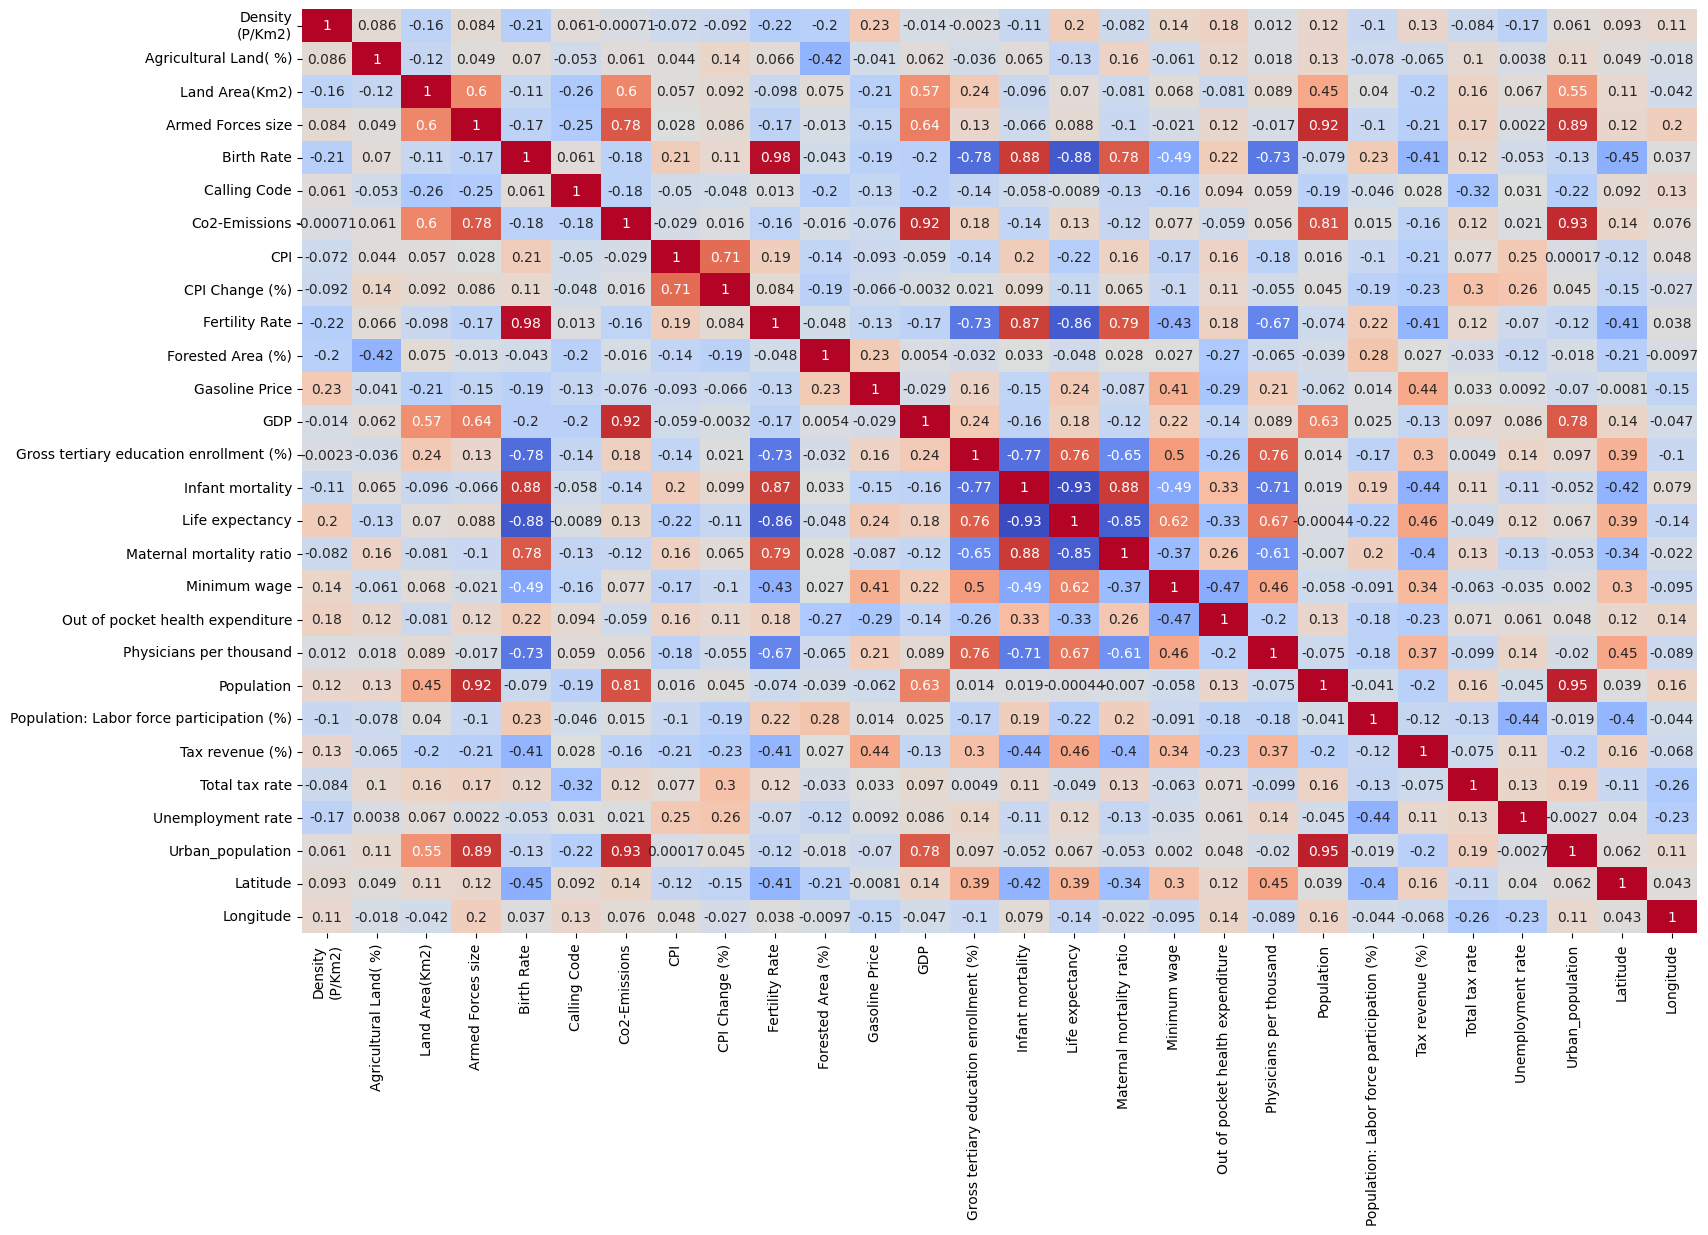

In [79]:
# Generating a linear correlation matrix to understand relationships between numerical features

correlation_matrix = data.corr(numeric_only=True)


# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(18,12))
sns.heatmap(correlation_matrix, cbar=False, cmap='coolwarm', annot=True)
plt.show()

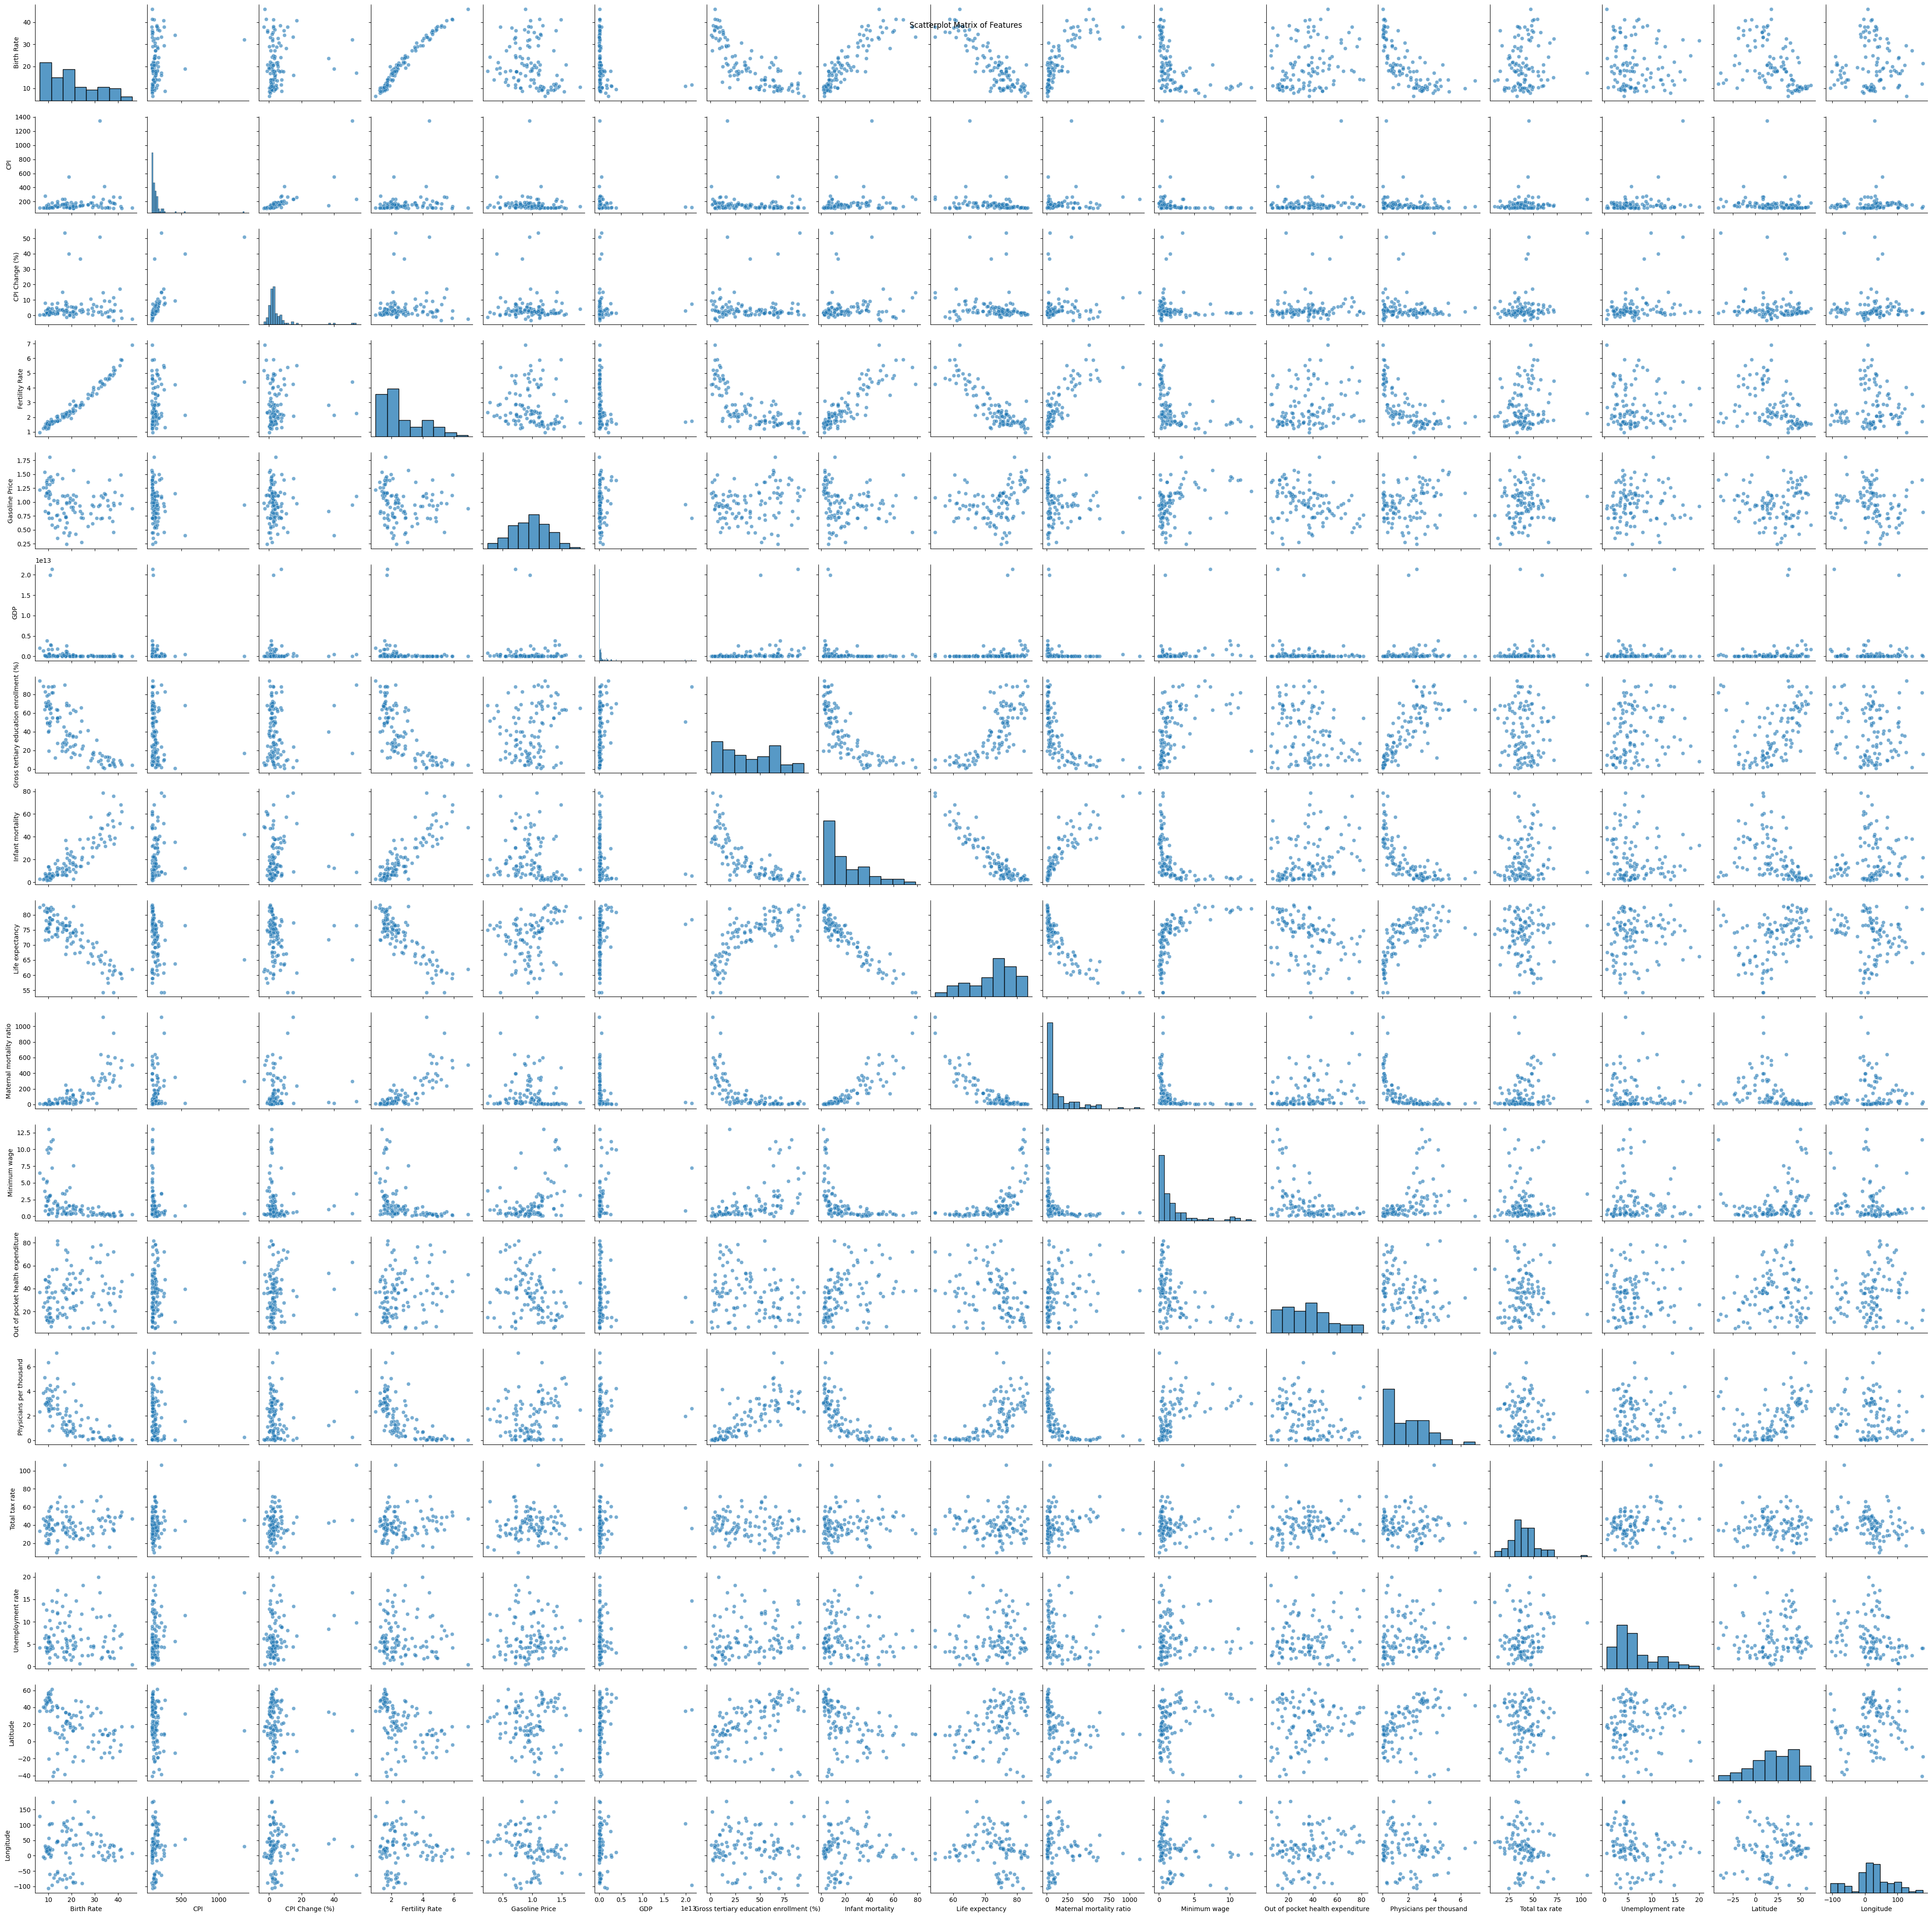

In [29]:
# Visualizing pairwise relationships between the selected features and target variables
# Using scatterplot matrices for the relationships and histograms for the distribution of individual features

sns.pairplot(data[potential_cols], diag_kind='hist', plot_kws={'alpha': 0.6})
plt.suptitle('Scatterplot Matrix of Features')
plt.tight_layout()
plt.show()

Correlated columns to fertility rate observed as below.

'Gross tertiary education enrollment (%)',

'Infant mortality',

'Life expectancy',

'Maternal mortality ratio',

'Minimum wage',

'Physicians per thousand',

'Tax revenue (%)',

'Latitude',

'Longitude'

## Detailed Data Analysis

In [81]:
# Identifying columns that appear to have a relationship with the 'Fertility Rate' based on visual inspection
# These columns will be further analyzed for potential correlations and dependencies with the fertility rate

analysis_cols = [
                 'Gross tertiary education enrollment (%)',
                 'Infant mortality',
                 'Life expectancy',
                 'Maternal mortality ratio',
                 'Minimum wage',
                 'Physicians per thousand',
                 'Tax revenue (%)',
                 'Latitude',
                 'Longitude']

### Fertility Rate

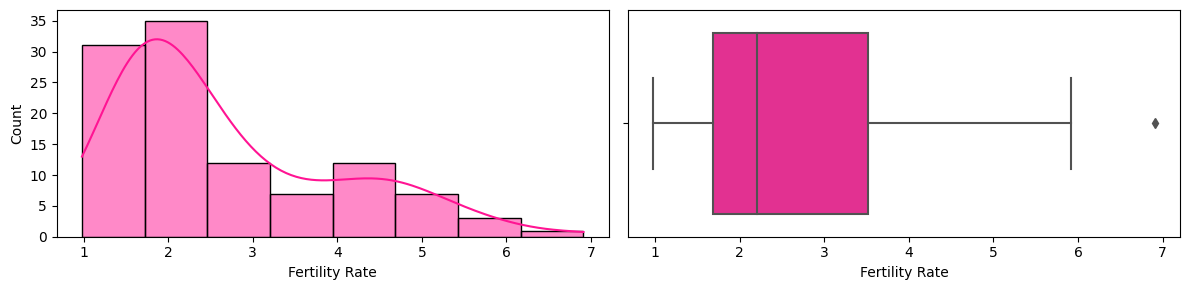

In [82]:

# Visualizing the distribution of 'Fertility Rate' using a histogram and a boxplot
# The histogram provides an overview of the data distribution, while the boxplot gives insights into quartiles and potential outliers.

fig, axes = plt.subplots(1, 2, figsize=(12,3))

# Histogram of Fertility Rate
sns.histplot(data['Fertility Rate'], color='DeepPink', kde=True, ax=axes[0])

# Boxplot of Fertility Rate
sns.boxplot(x=data['Fertility Rate'], color='DeepPink', ax=axes[1])

plt.tight_layout()
plt.show()


Fertility rate is mostly observed to be between 1 to 3 and goes up to 7.

### Feature & Target Analyses

#### Education's Impact


In [83]:
# Visualizing the relationship between 'Gross tertiary education enrollment (%)' and 'Fertility Rate' using a scatter plot
# Additionally, an Ordinary Least Squares (OLS) trendline is added to capture the linear relationship.

fig = px.scatter(data, x='Gross tertiary education enrollment (%)', y='Fertility Rate', trendline='ols', hover_data=['Country'])
fig.data[1].line.color = 'red'
fig.update_layout(title='Tertiary Education Enrollment & Fertility Rate Relationship')
fig.show()


Education's Impact: A pronounced negative correlation exists between gross tertiary education enrollment (%) and fertility rate. Countries with fewer individuals pursuing higher education often have higher birth rates. Delving deeper into this, socio-economic and cultural factors might be at play, suggesting that tertiary education, perhaps due to the delay in starting families or changing societal priorities, might influence fertility decisions.

#### Health Metrics and their Implications


<Figure size 1200x800 with 0 Axes>

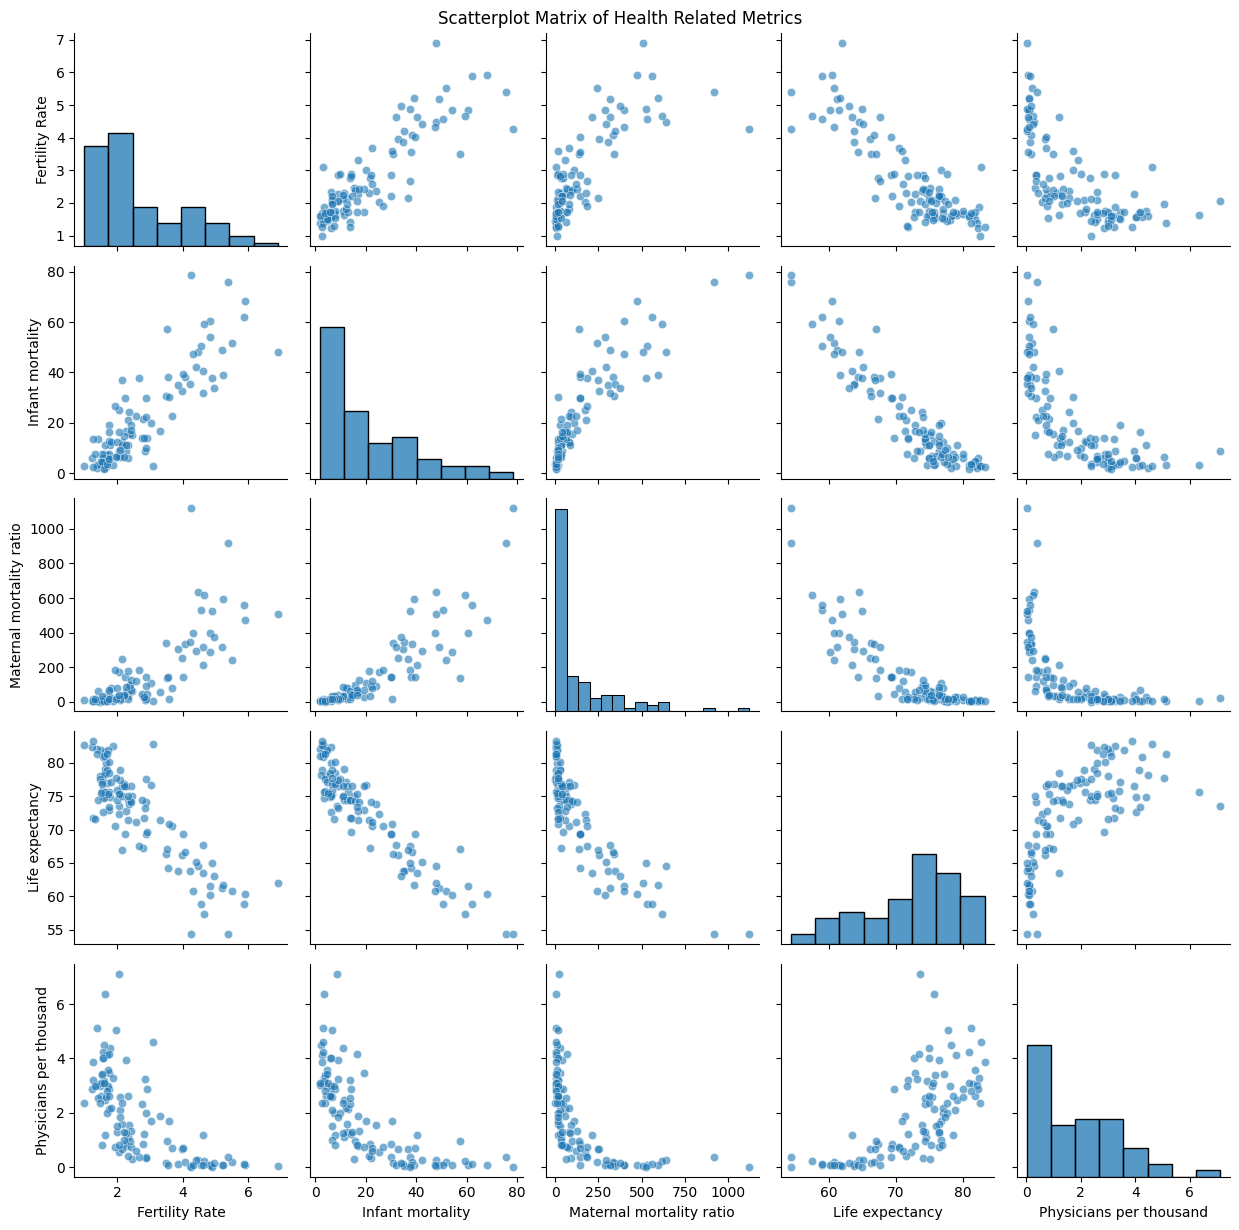

In [84]:
# Visualizing pairwise relationships between health-related metrics
# Using scatterplot matrices for the relationships and histograms for the distribution of individual metrics

health_columns = ['Fertility Rate', 'Infant mortality', 'Maternal mortality ratio', 'Life expectancy', 'Physicians per thousand']

plt.figure(figsize=(12,8))
sns.pairplot(data[health_columns], diag_kind='hist', plot_kws={'alpha': 0.6})
plt.suptitle('Scatterplot Matrix of Health Related Metrics')
plt.tight_layout()
plt.show()

In [85]:
# Visualizing multi-dimensional data with a Parallel Coordinates graph
# This plot provides insights into the relationships between the health-related metrics across multiple dimensions simultaneously
# The color is used to represent different values of the 'Fertility Rate' in a continuous manner

fig = px.parallel_coordinates(data, dimensions=health_columns[1:], color="Fertility Rate",
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              labels={column: column for column in health_columns})

fig.show()

Health Metrics and their Implications: A strong positive correlation is observed between mortality rates (both infant and maternal) and fertility rates. Simultaneously, an unexpected negative correlation surfaces between life expectancy and physicians per thousand. This could indicate other factors at work, such as healthcare infrastructure or public health initiatives, that influence life expectancy beyond just the physician density.

####  The Economic Story

<Figure size 1200x800 with 0 Axes>

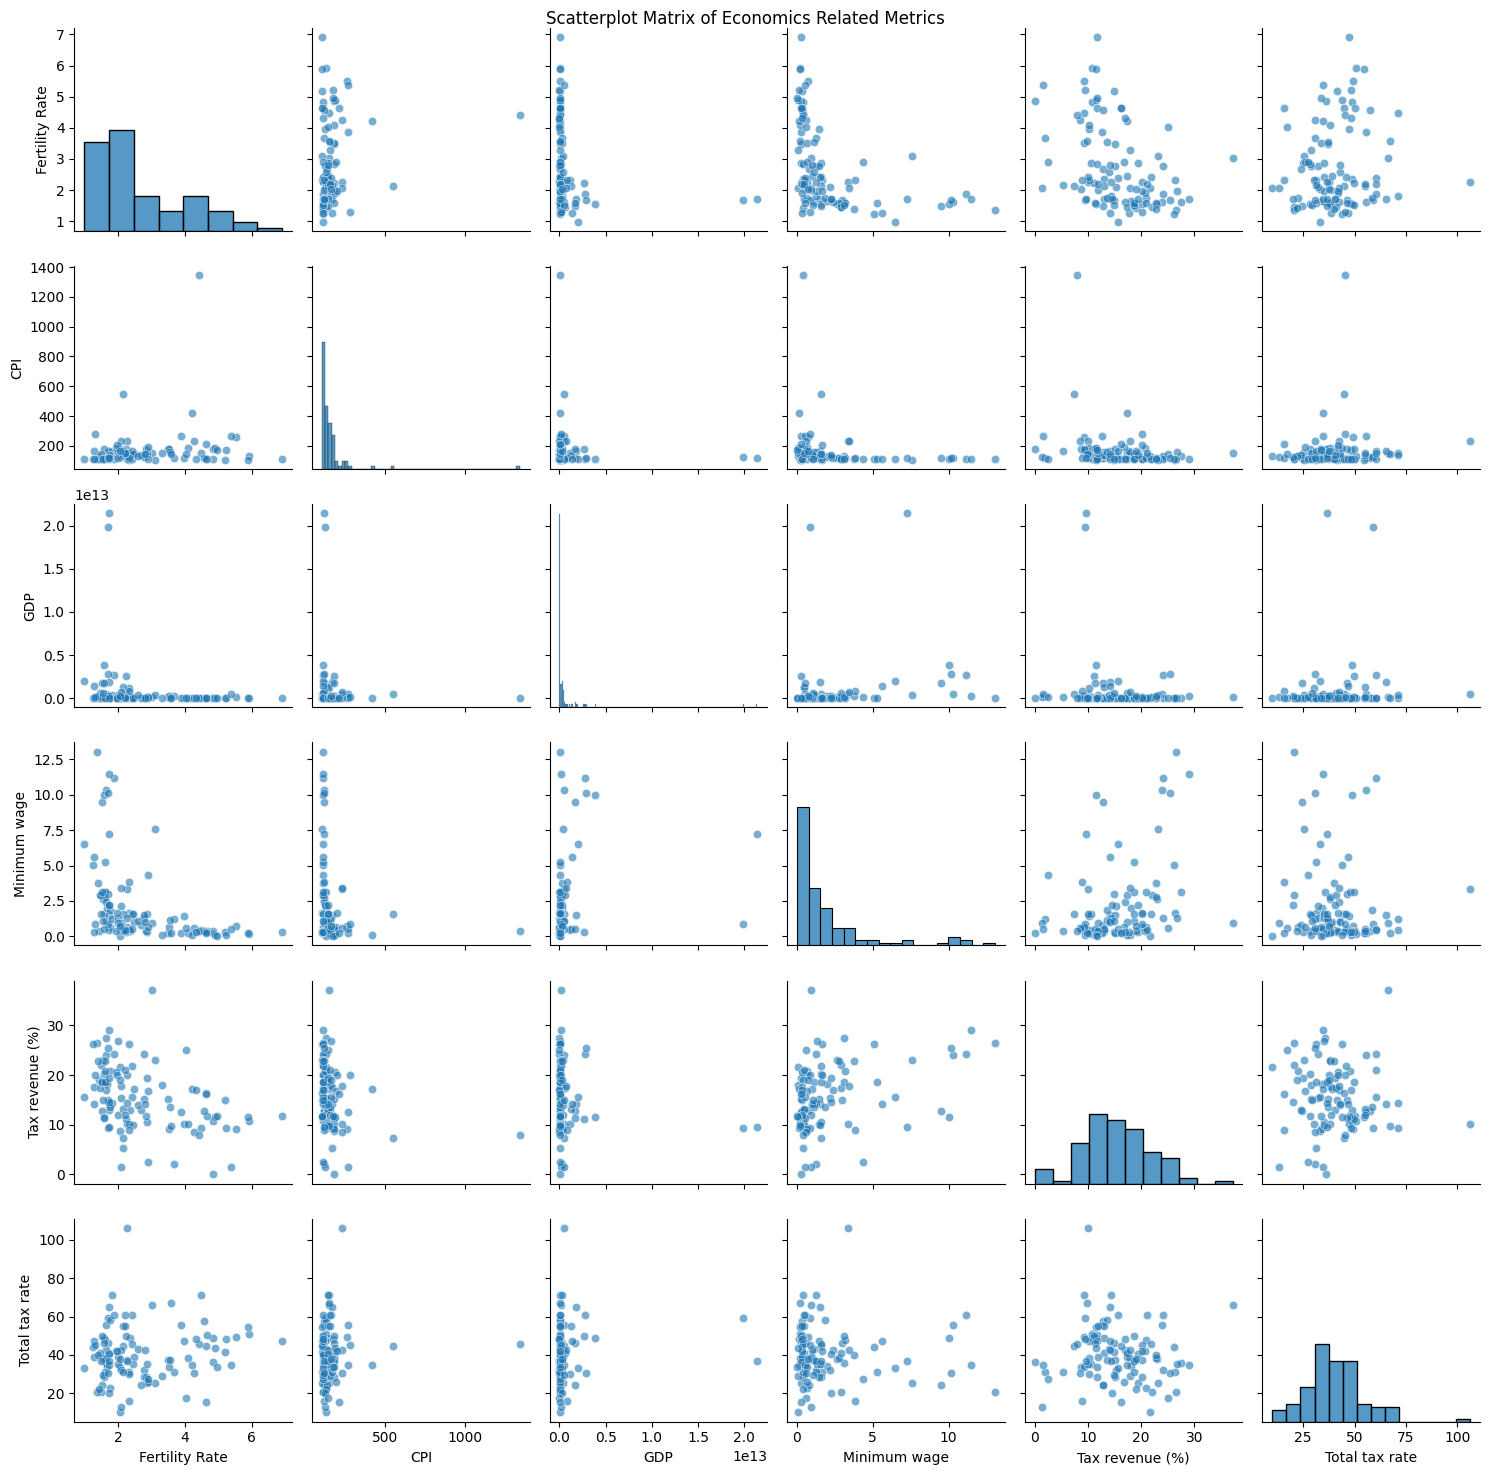

In [86]:
# Visualizing pairwise relationships between economic-related metrics
# Using scatterplot matrices to understand how each economic metric correlates with the others, and histograms to visualize the distribution of each metric

economic_columns = ['Fertility Rate', 'CPI', 'GDP', 'Minimum wage', 'Tax revenue (%)', 'Total tax rate']

plt.figure(figsize=(12,8))
sns.pairplot(data[economic_columns], diag_kind='hist', plot_kws={'alpha': 0.6})
plt.suptitle('Scatterplot Matrix of Economics Related Metrics')
plt.tight_layout()
plt.show()


Most related financial metrics are observed to be Minimum wage and Total tax rate.

In [87]:
# Visualizing the relationship between 'Minimum wage' and 'Fertility Rate'
# The scatter plot highlights each country's position based on these two metrics.
# An Ordinary Least Squares (OLS) trendline is added to capture the general trend.

fig = px.scatter(data, x='Minimum wage', y='Fertility Rate', trendline='ols', hover_data=['Country'])

fig.data[1].line.color = 'red'

fig.update_layout(title='Minimum wage & Fertility Rate Relationship')
fig.show()


In [88]:
#This chunk visualizes the relationship between Tax Revenue and Fertility Rate in two ways:
# A scatter plot showcasing individual data points with a trendline.
# A bar plot illustrating the mean Fertility Rate for different bins of Tax Revenue.

def aggregate_data_mean(bin_column, value_column, data):
    """
    Aggregate the specified data by bin_column and calculate the median of value_column.
    """
    aggregated_data = data.groupby(bin_column)[value_column].mean().reset_index()
    aggregated_data[bin_column] = aggregated_data[bin_column].astype(str)
    return aggregated_data

# Aggregating Data
avg_fertility_tax = aggregate_data_mean('taxrevenue_bin', 'Fertility Rate', data)

fig = make_subplots(rows=2, cols=1, subplot_titles=('Tax Revenue (%) and Fertility Rate Relationship Scatterplot', 'Tax Revenue (%) and Fertility Rate Relationship Barplot'))

# Create a scatter plot using plotly express
scatter_fig = px.scatter(data, x='Tax revenue (%)', y='Fertility Rate', trendline='ols', hover_data=['Country'])

# Change the trendline color to red
scatter_fig.data[1].line.color = 'red'

# Adding the scatter plot
for trace in scatter_fig.data:
    fig.add_trace(trace, row=1, col=1)

# Adding the barplot
bar_trace = px.bar(avg_fertility_tax , x='taxrevenue_bin', y='Fertility Rate').data[0]
fig.add_trace(bar_trace, row=2, col=1)

fig.update_xaxes(title_text="Tax revenue (%)", row=1, col=1)
fig.update_xaxes(title_text="Tax revenue bins", row=2, col=1)

fig.update_yaxes(title_text="Fertility Rate", row=1, col=1)
fig.update_yaxes(title_text="Fertility Rate", row=2, col=1)

fig.update_layout(showlegend=False, height=800, width=1000)

fig.show()



In [92]:
 # 3D Scatter Plot to visualize the relationships between Minimum wage, Fertility Rate, and Tax revenue (%)

 fig_3d_scatter = px.scatter_3d(data,
                                x='Minimum wage',
                                y='Fertility Rate',
                                z='Tax revenue (%)',
                                hover_name='Country',
                                size='Fertility Rate',
                                color='Fertility Rate')

 fig_3d_scatter.update_layout(title='Financial Metrics and Fertility Rate 3D Scatter Plot')
 fig_3d_scatter.show()

The Economic Story: Generally, as metrics like minimum wage or tax revenue as a percentage of GDP rise, fertility rates drop. However, outliers such as Algeria, which boasts high tax revenue as a percentage of GDP yet has a fertility rate exceeding 3, remind us of the complex interplay of local socio-economic conditions, cultural values, and policy decisions that might diverge from general global patterns.

####  Geographical Patterns

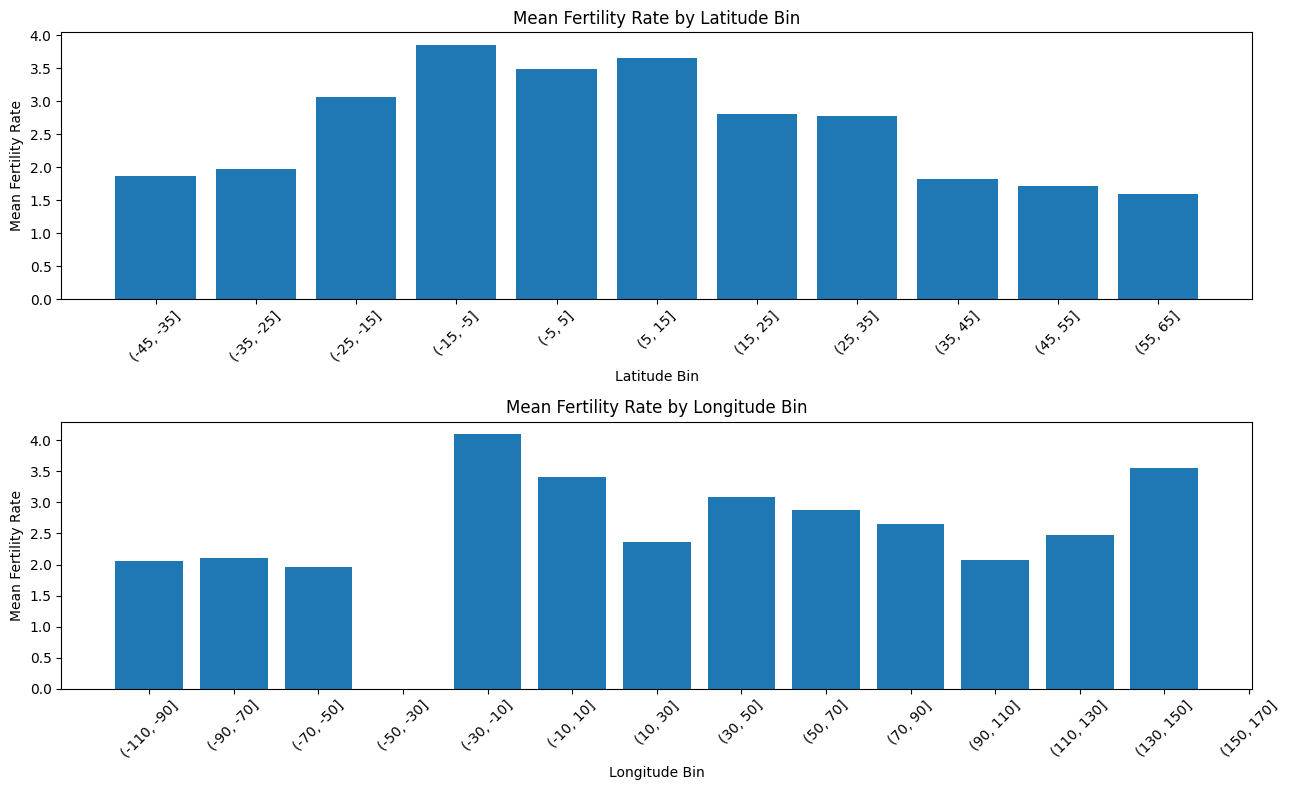

In [93]:
# Aggregating data to understand the mean fertility rate across different latitude and longitude bins


# Aggregate Data
avg_fertility_latitude = aggregate_data_mean('latitude_bin', 'Fertility Rate', data)
avg_fertility_longitude = aggregate_data_mean('longitude_bin', 'Fertility Rate', data)

# Plotting the aggregated data

# Initializing a 2x1 grid for plotting
fig = plt.figure(figsize=(13, 8))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1])

# Creating a bar plot for latitude bins
ax1 = plt.subplot(gs[0])
ax1.bar(avg_fertility_latitude['latitude_bin'], avg_fertility_latitude['Fertility Rate'])
ax1.set_title('Mean Fertility Rate by Latitude Bin')
ax1.set_xlabel('Latitude Bin')
ax1.set_ylabel('Mean Fertility Rate')
ax1.tick_params(axis='x', rotation=45)

# Creating a bar plot for longitude bins
ax2 = plt.subplot(gs[1])
ax2.bar(avg_fertility_longitude['longitude_bin'], avg_fertility_longitude['Fertility Rate'])
ax2.set_title('Mean Fertility Rate by Longitude Bin')
ax2.set_xlabel('Longitude Bin')
ax2.set_ylabel('Mean Fertility Rate')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

A pattern has been observed between fertility rate and latitude coordinates. By visualizing these coordinates on a map, we aim to identify countries with the highest and lowest fertility rates. This approach will provide a clearer geographical context to the observed data patterns.

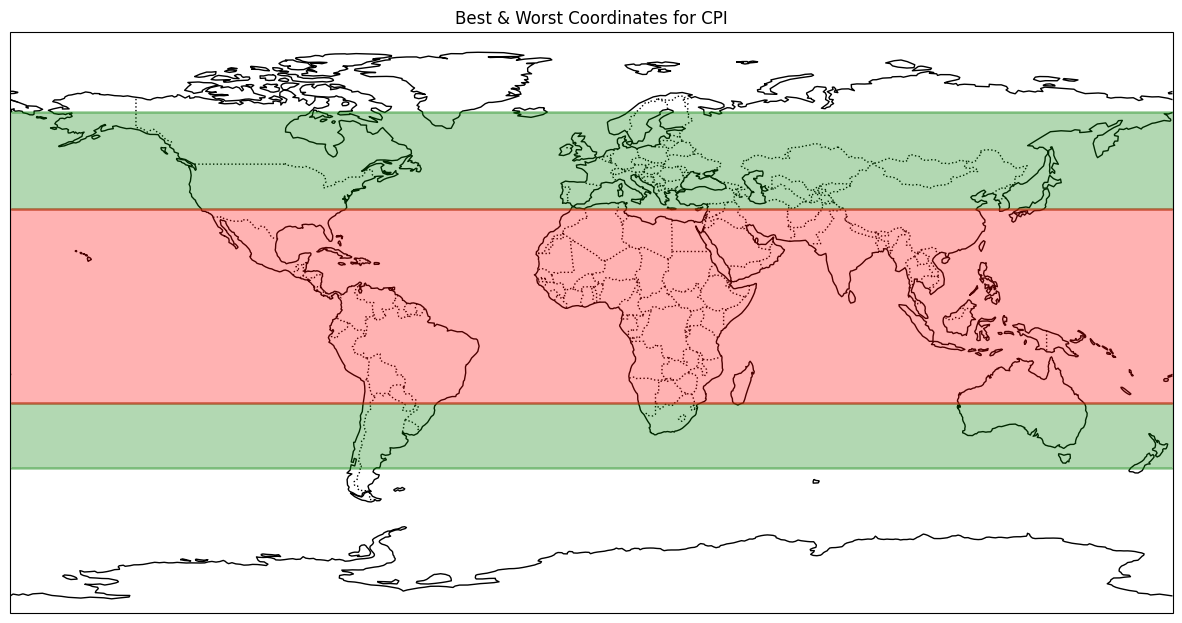

In [94]:
# Define polygons based on observed patterns in fertility rates and latitude coordinates.
# The green zones are expected to represent regions with lower fertility rates and the red zones for higher fertility rates.

# Green zones represent latitudes with lower fertility rates
green_zone_polygon = Polygon([[-180, 35], [-180, 65], [180, 65], [180, 35]])
green_zone_polygon_2 = Polygon([[-180, -45], [-180, -25], [180, -25], [180, -45]])

# Red zones represent latitudes with higher fertility rates
red_zone_polygon = Polygon([[-180, -25], [-180, 35], [180, 35], [180, -25]])


# Initializing a map with PlateCarree projection
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)

# Adding the green and red zones
ax.add_geometries([green_zone_polygon], crs=ccrs.PlateCarree(), facecolor='green', edgecolor='green', alpha=0.3)
ax.add_geometries([green_zone_polygon_2], crs=ccrs.PlateCarree(), facecolor='green', edgecolor='green', alpha=0.3)
ax.add_geometries([red_zone_polygon], crs=ccrs.PlateCarree(), facecolor='red', edgecolor='red', alpha=0.3)
ax.set_global()

plt.title("Best & Worst Coordinates for CPI")
plt.show()

To confirm the validity of our approach, we'll review the rows corresponding to the countries with the highest and lowest fertility rates. This will help determine if these countries are indeed captured within the geographic zones we've defined based on latitude.

In [57]:
data.sort_values(by='Fertility Rate', ascending=True).head(10)

Country  Density\n(P/Km2) Abbreviation  Agricultural Land( %)  \
162  South Korea             527.0           KR                   17.4   
106        Malta            1380.0           MT                   32.4   
164        Spain              94.0           ES                   52.6   
112      Moldova             123.0           MD                   74.2   
183      Ukraine              75.0           UA                   71.7   
100   Luxembourg             242.0           LU                   53.7   
140     Portugal             111.0           PT                   39.5   
109    Mauritius             626.0           MU                   42.4   
139       Poland             124.0           PL                   46.9   
41       Croatia              73.0           HR                   27.6   

     Land Area(Km2)  Armed Forces size  Birth Rate  Calling Code  \
162         99720.0           634000.0         6.4          82.0   
106           316.0             2000.0         9.2         356.0   
164        505370.0           196000.0         7.9          34.0   
112         33851.0             7000.0        10.1         373.0   
183        603550.0           297000.0         8.7         380.0   
100          2586.0             2000.0        10.3         352.0   
140         92212.0            52000.0         8.5         351.0   
109          2040.0             3000.0        10.2         230.0   
139        312685.0           191000.0        10.2          48.0   
41          56594.0            18000.0         9.0         385.0   

    Capital/Major City  Co2-Emissions     CPI  CPI Change (%) Currency-Code  \
162              Seoul       620302.0  115.16             0.4           KRW   
106           Valletta         1342.0  113.45             1.6           EUR   
164             Madrid       244002.0  110.96             0.7           EUR   
112            Chi����         5115.0  166.20             4.8           MDL   
183               Kyiv       202250.0  281.66             7.9           UAH   
100    Luxembourg City         8988.0  115.09             1.7           EUR   
140             Lisbon        48742.0  110.62             0.3           EUR   
109         Port Louis         4349.0  129.91             0.4           MUR   
139             Warsaw       299037.0  114.11             2.2           PLN   
41              Zagreb        17488.0  109.82             0.8           HRK   

     Fertility Rate  Forested Area (%)  Gasoline Price           GDP  \
162            0.98               63.4            1.22  2.029000e+12   
106            1.23                1.1            1.36  1.478616e+10   
164            1.26               36.9            1.26  1.394116e+12   
112            1.26               12.6            0.80  1.195544e+10   
183            1.30               16.7            0.83  1.537811e+11   
100            1.37               35.7            1.19  7.110492e+10   
140            1.38               34.6            1.54  2.376861e+11   
109            1.41               19.0            1.12  1.418044e+10   
139            1.46               30.9            1.07  5.921644e+11   
41             1.47               34.4            1.26  6.041555e+10   

     Gross tertiary education enrollment (%)  Infant mortality  \
162                                     94.3               2.7   
106                                     54.3               6.1   
164                                     88.9               2.5   
112                                     39.8              13.6   
183                                     82.7               7.5   
100                                     19.2               1.9   
140                                     63.9               3.1   
109                                     40.6              13.6   
139                                     67.8               3.8   
41                                      67.9               4.0   

        Largest city  Life expectancy  Maternal mortali

In [58]:
data.sort_values(by='Fertility Rate', ascending=False).head(10)

Country  Density\n(P/Km2) Abbreviation  \
125                             Niger              19.0           NE   
45   Democratic Republic of the Congo              40.0           CD   
105                              Mali              17.0           ML   
4                              Angola              26.0           AO   
126                           Nigeria             226.0           NG   
62                         The Gambia             239.0           GM   
26                       Burkina Faso              76.0           BF   
182                            Uganda             229.0           UG   
172                          Tanzania              67.0           TZ   
117                        Mozambique              40.0           MZ   

     Agricultural Land( %)  Land Area(Km2)  Armed Forces size  Birth Rate  \
125                   36.1       1267000.0            10000.0       46.08   
45                    11.6       2344858.0           134000.0       41.18   
105                   33.8       1240192.0            18000.0       41.54   
4                     47.5       1246700.0           117000.0       40.73   
126                   77.7        923768.0           215000.0       37.91   
62                    59.8         11300.0             1000.0       38.54   
26                    44.2        274200.0            11000.0       37.93   
182                   71.9        241038.0            46000.0       38.14   
172                   44.8        947300.0            28000.0       36.70   
117                   63.5        799380.0            11000.0       37.52   

     Calling Code Capital/Major City  Co2-Emissions     CPI  CPI Change (%)  \
125         227.0             Niamey         2017.0  109.32            -2.5   
45          243.0           Kinshasa         2021.0  133.85             2.9   
105         223.0             Bamako         3179.0  108.73            -1.7   
4           244.0             Luanda        34693.0  261.73            17.1   
126         234.0              Abuja       120369.0  267.51            11.4   
62          220.0             Banjul          532.0  172.73             7.1   
26          226.0        Ouagadougou         3418.0  106.58            -3.2   
182         256.0            Kampala         5680.0  173.87             2.9   
172         255.0             Dodoma        11973.0  187.43             3.5   
117         258.0             Maputo         7943.0  182.31             2.8   

    Currency-Code  Fertility Rate  Forested Area (%)  Gasoline Price  \
125           XOF            6.91                0.9            0.88   
45            CDF            5.92               67.2            1.49   
105           XOF            5.88                3.8            1.12   
4             AOA            5.52               46.3            0.97   
126           NGN            5.39                7.2            0.46   
62            GMD            5.22               48.4            1.18   
26            XOF            5.19               19.3            0.98   
182           UGX            4.96                9.7            0.94   
172           TZS            4.89               51.6            0.87   
117           MZN            4.85               48.0            0.65   

              GDP  Gross tertiary education enrollment (%)  Infant mortality  \
125  1.292815e+10                                      4.4              48.0   
45   4.731962e+10                                      6.6              68.2   
105  1.751014e+10                                      4.5              62.0   
4    9.463542e+10                                      9.3              51.6   
126  4.481204e+11                                     10.2              75.7   
62   1.763819e+09                                      2.7              39.0   
26   1.574581e+10                                      6.5              49.0   
182  3.438723e+10                                      4.8              33.8   
172  6

Based on our visualization, it seems we've effectively encompassed most of the countries with higher or lower fertility rates using the defined latitudinal zones.

Geographical Patterns: A geospatial perspective shows distinct zones of fertility rates. The latitudinal zone between 35° and 65° North and 25° and 45° South predominantly features countries with lower fertility rates, whereas the zone between 25° North and 25° South is associated with higher fertility rates. Incorporating geospatial visualizations in our future reports can further illuminate these patterns, providing stakeholders with a visual guide to these trends.

# Final Conclusions

1. Education's Impact: A pronounced negative correlation exists between gross tertiary education enrollment (%) and fertility rate. Countries with fewer individuals pursuing higher education often have higher birth rates. Delving deeper into this, socio-economic and cultural factors might be at play, suggesting that tertiary education, perhaps due to the delay in starting families or changing societal priorities, might influence fertility decisions.

2. Health Metrics and their Implications: A strong positive correlation is observed between mortality rates (both infant and maternal) and fertility rates. Simultaneously, an unexpected negative correlation surfaces between life expectancy and physicians per thousand. This could indicate other factors at work, such as healthcare infrastructure or public health initiatives, that influence life expectancy beyond just the physician density.

3. The Economic Story: Generally, as metrics like minimum wage or tax revenue as a percentage of GDP rise, fertility rates drop. However, outliers such as Algeria, which boasts high tax revenue as a percentage of GDP yet has a fertility rate exceeding 3, remind us of the complex interplay of local socio-economic conditions, cultural values, and policy decisions that might diverge from general global patterns.

4. Geographical Patterns: A geospatial perspective shows distinct zones of fertility rates. The latitudinal zone between 35° and 65° North and 25° and 45° South predominantly features countries with lower fertility rates, whereas the zone between 25° North and 25° South is associated with higher fertility rates. Incorporating geospatial visualizations in our future reports can further illuminate these patterns, providing stakeholders with a visual guide to these trends.

Final Thoughts: While this analysis highlights several factors correlating with fertility rates across nations, it's crucial to avoid over-generalization. Outliers and exceptions underscore the multi-layered influences on fertility. Incorporating additional datasets, especially those touching upon cultural and religious aspects, could offer a more comprehensive understanding of global fertility dynamics.